In [2]:
%matplotlib inline


# Exercise 1: Random Forest classification
1. Open the Jupyter Notebook “plot_sparse_logistic_regression”
2. Change the classifier to a Random Forest Classifier, and test it on the same dataset


In [3]:
import time

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

# Turn down for faster convergence
t0 = time.time()
train_samples = 5000

# Load data from https://www.openml.org/d/554
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)
X = X.reshape((X.shape[0], -1))

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=train_samples, test_size=10000
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

clf = RandomForestClassifier(n_estimators=10)
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
print("Test score: %.4f" % score)

# removed the plot because randomForestClassifier doesn't have coef_ which we used to plot the Logistic Regression
# coef_ was a ndarray of shape (10, 784) which is (n_classes, n_features)
# randomForest has a ndarray of shape (10,) which is (n_classes,) and one of shape (784,) which is (n_features,)
# I'm guessing I could've glued those together somehow, but I don't know if that had been the point, because it says nothing
# about it in the instructions

run_time = time.time() - t0
print("Example run in %.3f s" % run_time)

C:\Users\jassi\OneDrive\Dokumente\FH\BIF\2023_WS\CVNLP\venv\lib\site-packages\sklearn\datasets\_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Test score: 0.8883
Example run in 34.125 s


compare with logistic regression:
```
Sparsity with L1 penalty: 78.75%
Test score with L1 penalty: 0.8261
Example run in 35.201 s
```
roughly +6% accuracy in half of the time. that's nice!

# Exercise 2: Multi-layer Perceptron
1. Open the Jupyter Notebook “plot_multi_layer_perceptron_mnist.py”
2. From the Code, try to interpret what the images at the end of the notebook depict. What does one pixel in the image correspond to in the multi-layer perceptron? (Hint: you might want to print and compare the shape of the mlp.coef_ data to the mlp architecture)

C:\Users\jassi\OneDrive\Dokumente\FH\BIF\2023_WS\CVNLP\venv\lib\site-packages\sklearn\datasets\_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Iteration 1, loss = 0.44139186
Iteration 2, loss = 0.19174891
Iteration 3, loss = 0.13983521
Iteration 4, loss = 0.11378556
Iteration 5, loss = 0.09443967
Iteration 6, loss = 0.07846529
Iteration 7, loss = 0.06506307
Iteration 8, loss = 0.05534985
Training set score: 0.986429
Test set score: 0.953061


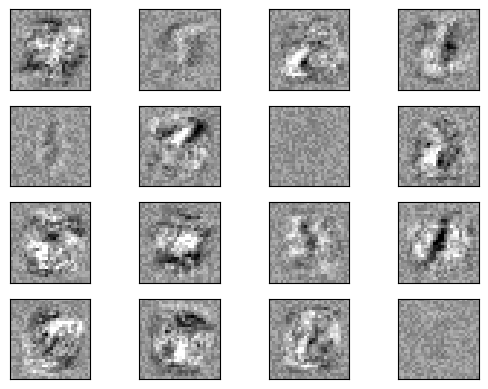

In [4]:
import warnings
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.exceptions import ConvergenceWarning
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

# Load data from https://www.openml.org/d/554
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)
X = X / 255.0

# Split data into train partition and test partition
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.7)

mlp = MLPClassifier(
    hidden_layer_sizes=(40,),
    max_iter=8,
    alpha=1e-4,
    solver="sgd",
    verbose=10,
    random_state=1,
    learning_rate_init=0.2,
)

# this example won't converge because of resource usage constraints on
# our Continuous Integration infrastructure, so we catch the warning and
# ignore it here
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")
    mlp.fit(X_train, y_train)

print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

fig, axes = plt.subplots(4, 4)
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=0.5 * vmin, vmax=0.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

each iput pixel has an edge leading to one of the 40 nodes of the first hidden layer. therefore coefs[0] has the shape (784, 40)
each column of this matrix represents one node and thus each cell in the matrix (i.e. each pixel in one of the images)
represents one weight
so the first column e.g. represents one node in the first hidden layer and the 784 entries in the column define how much each pixel 
of the input image is weighted
therefore what we see in these pictures is the weighting, where dark areas represent lighter weights (smaller numbers) and
lighter areas represent heavier weights (bigger numbers) 
e.g. the third image in the right most column has a dark slash through the middle. this shows that the pixels of the input images
which are being fed into the neural network, are less weighted in this area and more weighted in the lighter areas.

question: is this an activation map, kind of?

# Exercise 3: Keras implementation
3. Open the python Script “mnist_convnet.py”
4. Add an additional convolutional layer at the start, with 16 filters, a kernel size of 3 x 3, and relu activation, as well as a Maxpooling2D Layer with pool_size of 2x2
5. Run the program and compare it to the original version

original output:
```
Downloading data from https://storage.googleapis.com/tensorflow/tf-keras-datasets/mnist.npz
11490434/11490434 [==============================] - 2s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
2023-09-28 09:18:56.437821: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE SSE2 SSE3 SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
=================================================================
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 10)                16010     
                                                                 
=================================================================
Total params: 34826 (136.04 KB)
Trainable params: 34826 (136.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/15
422/422 [==============================] - 26s 58ms/step - loss: 0.3740 - accuracy: 0.8864 - val_loss: 0.0792 - val_accuracy: 0.9800
Epoch 2/15
422/422 [==============================] - 25s 59ms/step - loss: 0.1128 - accuracy: 0.9650 - val_loss: 0.0560 - val_accuracy: 0.9843
Epoch 3/15
422/422 [==============================] - 25s 60ms/step - loss: 0.0837 - accuracy: 0.9745 - val_loss: 0.0444 - val_accuracy: 0.9885
Epoch 4/15
422/422 [==============================] - 27s 65ms/step - loss: 0.0716 - accuracy: 0.9776 - val_loss: 0.0393 - val_accuracy: 0.9893
Epoch 5/15
422/422 [==============================] - 22s 52ms/step - loss: 0.0612 - accuracy: 0.9812 - val_loss: 0.0396 - val_accuracy: 0.9883
Epoch 6/15
422/422 [==============================] - 21s 51ms/step - loss: 0.0574 - accuracy: 0.9827 - val_loss: 0.0373 - val_accuracy: 0.9903
Epoch 7/15
422/422 [==============================] - 21s 50ms/step - loss: 0.0509 - accuracy: 0.9838 - val_loss: 0.0355 - val_accuracy: 0.9890
Epoch 8/15
422/422 [==============================] - 24s 58ms/step - loss: 0.0471 - accuracy: 0.9851 - val_loss: 0.0299 - val_accuracy: 0.9913
Epoch 9/15
422/422 [==============================] - 22s 52ms/step - loss: 0.0440 - accuracy: 0.9861 - val_loss: 0.0297 - val_accuracy: 0.9923
Epoch 10/15
422/422 [==============================] - 18s 44ms/step - loss: 0.0414 - accuracy: 0.9865 - val_loss: 0.0301 - val_accuracy: 0.9913
Epoch 11/15
422/422 [==============================] - 21s 50ms/step - loss: 0.0408 - accuracy: 0.9870 - val_loss: 0.0295 - val_accuracy: 0.9923
Epoch 12/15
422/422 [==============================] - 20s 47ms/step - loss: 0.0354 - accuracy: 0.9888 - val_loss: 0.0273 - val_accuracy: 0.9923
Epoch 13/15
422/422 [==============================] - 21s 50ms/step - loss: 0.0370 - accuracy: 0.9876 - val_loss: 0.0301 - val_accuracy: 0.9918
Epoch 14/15
422/422 [==============================] - 22s 51ms/step - loss: 0.0348 - accuracy: 0.9886 - val_loss: 0.0274 - val_accuracy: 0.9925
Epoch 15/15
422/422 [==============================] - 22s 52ms/step - loss: 0.0321 - accuracy: 0.9897 - val_loss: 0.0267 - val_accuracy: 0.9918
Test loss: 0.023853261023759842
Test accuracy: 0.9921000003814697
```

In [5]:
"""
Title: Simple MNIST convnet
Author: [fchollet](https://twitter.com/fchollet)
Date created: 2015/06/19
Last modified: 2020/04/21
Description: A simple convnet that achieves ~99% test accuracy on MNIST.
"""

"""
## Setup
"""

import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

"""
## Prepare the data
"""

# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

"""## Build the model 
docu for convolutional layer (conv2d()):
https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D
docu for maxpooling layer (maxpooling2d()):
https://www.tensorflow.org/api_docs/python/tf/compat/v1/layers/MaxPooling2D
"""

model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
    # here comes the additional convolutional layer
        layers.Conv2D(16, kernel_size=(3, 3), activation="relu"),
    # here comes the additional max pooling layer
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

"""
## Train the model
"""

batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

"""
## Evaluate the trained model
"""

score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 13, 13, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 64)          18496     
                                               

the example with the additional layers was much faster and a little bit less accurate (-1%)
i don't know exactly, what the loss is though. this is higher now.

question: what is the loss?